# **Problem 1: Part d**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

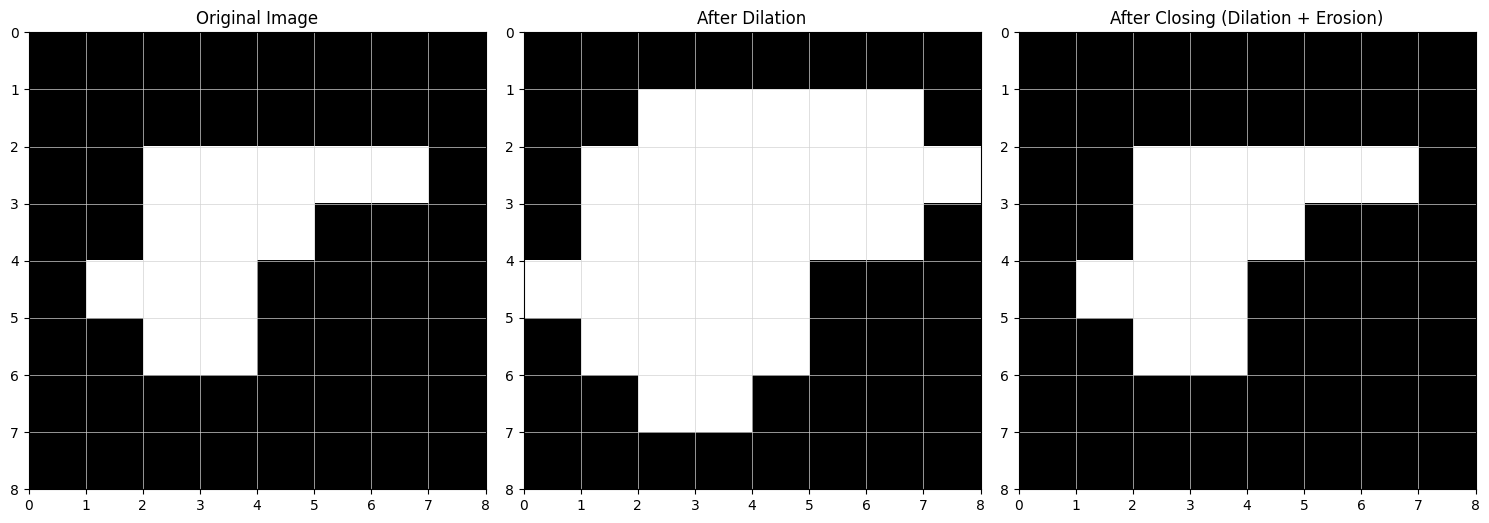

In [ ]:
# Define binary image
image = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 0],
    [0, 0, 1, 1, 1, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 0, 0],
    [0, 0, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0]
])

# Define structuring element
structuring_element = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]
])


# Erosion function
def erosion(image, se):
    image_h, image_w = image.shape
    se_h, se_w = se.shape
    pad_h, pad_w = se_h // 2, se_w // 2
    output = np.zeros_like(image)
    for i in range(pad_h, image_h - pad_h):
        for j in range(pad_w, image_w - pad_w):
            region = image[i - pad_h:i + pad_h + 1, j - pad_w:j + pad_w + 1]
            if np.all(region[se == 1] == 1):
                output[i, j] = 1
    return output

# Dilation function
def dilation(image, se):
    image_h, image_w = image.shape
    se_h, se_w = se.shape
    pad_h, pad_w = se_h // 2, se_w // 2
    output = np.zeros_like(image)
    for i in range(image_h):  
        for j in range(image_w):
            if image[i, j] == 1:
                for m in range(se_h):
                    for n in range(se_w):
                        if se[m, n] == 1:
                            ni = i + m - pad_h
                            nj = j + n - pad_w
                            if 0 <= ni < image_h and 0 <= nj < image_w:
                                output[ni, nj] = 1
    return output

dilated_image = dilation(image, structuring_element)   # Apply Dilation
closed_image = erosion(dilated_image, structuring_element)   # Apply Erosion to dilated image

# Display original, eroded, and opened images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

titles = ['Original Image', 'After Dilation', 'After Closing (Dilation + Erosion)']
images = [image, dilated_image, closed_image]

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img, cmap='gray', extent=[0, image.shape[1], image.shape[0], 0], origin='upper')
    ax.set_title(title)
    ax.set_xticks(np.arange(image.shape[1] + 1))
    ax.set_yticks(np.arange(image.shape[0] + 1))
    ax.grid(True, color='lightgray', linewidth=0.5)
    ax.set_xlim(0, image.shape[1])
    ax.set_ylim(image.shape[0], 0)

plt.tight_layout()
plt.show()